In [61]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt

In [62]:
uploaded = files.upload()

Saving Mahasiswa.xls to Mahasiswa (2).xls


baca data

In [63]:
df = pd.read_excel(io.BytesIO(uploaded['Mahasiswa.xls']))
dama = []
for i in range (len(df)):
  dama.append([df["Id"][i],df["Penghasilan"][i],df["Pengeluaran"][i]])


Membership

Penghasilan

In [64]:
def penren(x):
  if (x <= 5):
    return 1
  elif (x > 11):
    return 0
  else:
    return ((11 - x) / (11 - 5))
def penting(x):
  if (x < 13):
    return 0 
  elif (x >= 17):
    return 1
  else:
    return ((x - 13) / (17 - 13))
def pensed(x):
  if (x <= 8) or (x >= 16):
    return 0
  elif (x < 12 ) and (x > 8):
    return ((x - 8)/(16 - 8))
  elif (x >= 12 ) and (x < 16):
    return -((x - 16)/(16 - 12))


In [65]:
def penghasilan(x):
  hasil=[]
  if (x < 11):
    hasil.append((('rendah'), penren(x)))
  if (x > 13):
    hasil.append((('tinggi'), penting(x)))
  if ((x < 16) and (x > 8)):
    hasil.append((('sedang'), pensed(x)))
  return hasil

Pengeluaran

In [66]:
def pengren(x):
  if (x <= 4):
    return 1
  elif (x > 7):
    return 0
  else:
    return ((7 - x) / (7 - 4))
def pengting(x):
  if (x < 9):
    return 0 
  elif (x >= 11):
    return 1
  else:
    return ((x - 9) / (11 - 9))
def pengsed(x):
  if (x <= 6) or (x > 10):
    return 0
  elif (x <= 10 ) and (x > 6):
    return ((x - 6)/(10 - 6))
  else:
    return -((x - 10)/(10 - 8))

In [67]:
def pengeluaran(x):
  hasil=[]
  if (x < 7):
    hasil.append((('rendah'), pengren(x)))
  if (x > 9):
    hasil.append((('tinggi'), pengting(x)))
  if ((x < 10) and (x > 6)):
    hasil.append((('sedang'), pengsed(x)))
  return hasil

[('rendah', 0.16666666666666666), ('sedang', 0.125)]

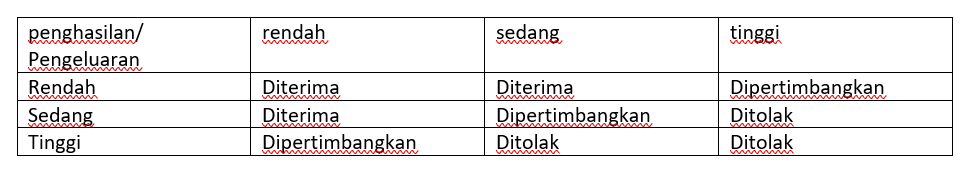

In [68]:
def fuzzyrule(pen, peng):
  if ((peng=='rendah') and (pen=='rendah')) or ((peng=='rendah') and (pen=='sedang')) or ((peng=='sedang') and (pen=='rendah')):
    return ('Diterima')
  elif ((peng=='tinggi') and (pen=='tinggi')) or ((peng=='tinggi') and (pen=='sedang')) or ((peng=='sedang') and (pen=='tinggi')):
    return ('Ditolak')
  else:
    return ('Dipertimbangkan')


'Dipertimbangkan'

In [69]:
def inference(penghasilan, pengeluaran):
  hasil = []
  if (len(penghasilan) == 1 and len(pengeluaran) == 1):
    hasil.append((fuzzyrule(penghasilan[0][0],pengeluaran[0][0]),min(penghasilan[0][1],pengeluaran[0][1])))

  elif (len(penghasilan) == 1 and len(pengeluaran) == 2):
    hasil.append((fuzzyrule(penghasilan[0][0],pengeluaran[0][0]),min(penghasilan[0][1],pengeluaran[0][1])))
    hasil.append((fuzzyrule(penghasilan[0][0],pengeluaran[1][0]),min(penghasilan[0][1],pengeluaran[1][1])))

  elif (len(penghasilan) == 2 and len(pengeluaran) == 1):
    hasil.append((fuzzyrule(penghasilan[0][0],pengeluaran[0][0]),min(penghasilan[0][1],pengeluaran[0][1])))
    hasil.append((fuzzyrule(penghasilan[1][0],pengeluaran[0][0]),min(penghasilan[1][1],pengeluaran[0][1])))

  else:
    hasil.append((fuzzyrule(penghasilan[0][0],pengeluaran[0][0]),min(penghasilan[0][1],pengeluaran[0][1])))
    hasil.append((fuzzyrule(penghasilan[0][0],pengeluaran[1][0]),min(penghasilan[0][1],pengeluaran[1][1])))
    hasil.append((fuzzyrule(penghasilan[1][0],pengeluaran[1][0]),min(penghasilan[1][1],pengeluaran[1][1])))
    hasil.append((fuzzyrule(penghasilan[1][0],pengeluaran[0][0]),min(penghasilan[1][1],pengeluaran[0][1])))
  a = 0
  b = 0
  c = 0
  for i in hasil:
    if i[0] == 'Diterima':
      if i[1] > a:
        a = i[1]
    if i[0] == 'Dipertimbangkan':
      if i[1] > b:
        b = i[1]
    if i[0] == 'Ditolak':
      if i[1] > c:
        c = i[1]
    
  # if ((hasil[0][0]) == (hasil[1][0])):
  #   hasil = max(hasil[0],hasil[1])
  return (('Diterima',a),('Dipertimbangkan',b),('Ditolak',c))

In [70]:
x = pengeluaran(9.5)
y = penghasilan(8.1)
x,y


([('tinggi', 0.25), ('sedang', 0.875)],
 [('rendah', 0.4833333333333334), ('sedang', 0.012499999999999956)])

In [71]:
inference(y,x)

(('Diterima', 0.4833333333333334),
 ('Dipertimbangkan', 0.25),
 ('Ditolak', 0.012499999999999956))

In [72]:
def sugeno(a,b,c):
  x= 30
  y= 50
  z= 80
  NK = ((a[1]*x)+(b[1]*y)+(c[1]*z))/(a[1]+b[1]+c[1])
  return NK
  
hasil=inference(y,x) 
sugeno(hasil[0],hasil[1],hasil[2])

37.541899441340775

In [76]:
bantuan = []
for i in dama:
  hasil = inference(pengeluaran(i[2]),penghasilan(i[1])) 
  a = sugeno(hasil[0],hasil[1],hasil[2])
  bantuan.append(a)

bantuan = sorted(list(zip(bantuan,df.Id)),  reverse=True)
bantuan = [i[1] for i in bantuan]
print('20 mahasiswa yang layak mendapatkan bantuan')
print(bantuan[:20])
pd.DataFrame(bantuan[:20]).to_excel('Bantuan.xlsx', header=False, index=False)

20 mahasiswa yang layak mendapatkan bantuan
[97, 98, 96, 95, 92, 90, 88, 83, 82, 77, 65, 64, 62, 58, 57, 55, 54, 45, 44, 43]
